In [22]:
from pandas import read_csv
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [21]:
filename='./pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df=read_csv(filename,names=names)
array=df.values

x=array[:,0:8]
Y=array[:,8]

In [5]:
pca=PCA(n_components=3)
fit=pca.fit(x)

In [15]:
print("Explained variance: ",fit.explained_variance_)
print(fit.components_)

Explained variance:  [13456.57298102   932.76013231   390.57783115]
[[-2.02176587e-03  9.78115765e-02  1.60930503e-02  6.07566861e-02
   9.93110844e-01  1.40108085e-02  5.37167919e-04 -3.56474430e-03]
 [ 2.26488861e-02  9.72210040e-01  1.41909330e-01 -5.78614699e-02
  -9.46266913e-02  4.69729766e-02  8.16804621e-04  1.40168181e-01]
 [ 2.24649003e-02 -1.43428710e-01  9.22467192e-01  3.07013055e-01
  -2.09773019e-02  1.32444542e-01  6.39983017e-04  1.25454310e-01]]


In [16]:
print(fit.get_params)

<bound method BaseEstimator.get_params of PCA(n_components=3)>


In [17]:
scaler = StandardScaler()
scaler.fit(x)
x=scaler.transform(x)    

pca = PCA()
x_new = pca.fit_transform(x)

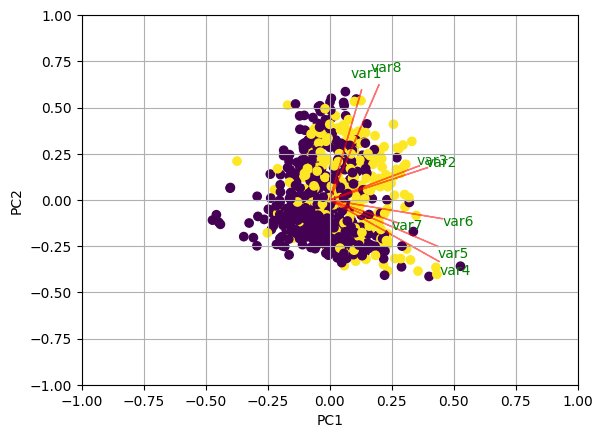

In [23]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = Y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()